In [1]:
!mkdir -p drive
!google-drive-ocamlfuse drive
from google.colab import drive
drive.mount('/content/drive')
import os
# 此处为google drive中的文件路径,drive为之前指定的工作根目录，要加上
os.chdir("drive/My Drive/2023kd")

/bin/bash: line 1: google-drive-ocamlfuse: command not found
Mounted at /content/drive


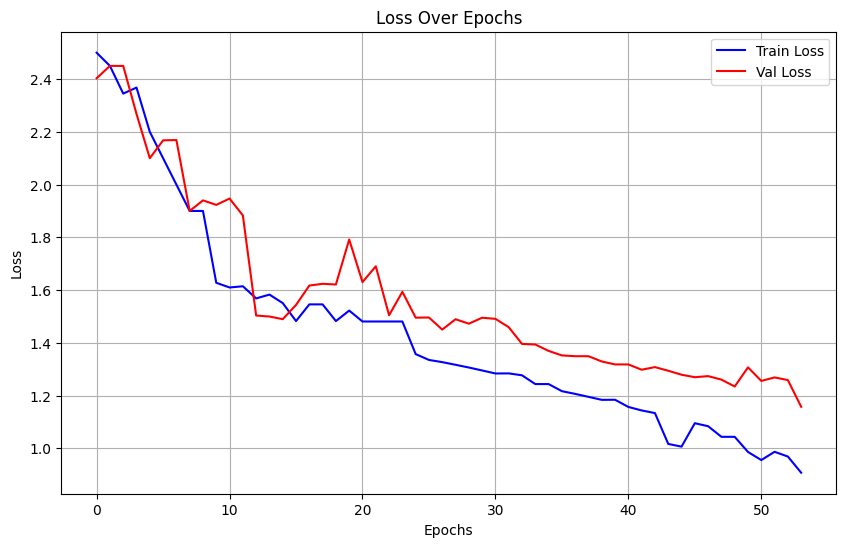

In [ ]:
import matplotlib.pyplot as plt

# 假设loss_values是一个包含每个epoch训练损失的列表
loss_values = [2.5, 2.45, 2.345, 2.367888, 2.2, 2.1, 2.0, 1.9, 1.9,
                1.6276,1.6098, 1.6144, 1.5684, 1.5828, 1.5507, 1.4824, 1.5457, 1.5457,
               1.4824, 1.5222, 1.4808, 1.4808, 1.4808, 1.4808, 1.3572, 1.3350, 1.3267,
               1.3166, 1.3063, 1.2951, 1.2837, 1.2840, 1.2768, 1.2435, 1.2435,
               1.2166, 1.2063, 1.1951, 1.1837, 1.1840, 1.1568, 1.1435, 1.1335,
               1.0166, 1.0063, 1.0951, 1.0837, 1.0435, 1.0435,
                0.9860, 0.9554,0.9867,0.96867,0.90735]
val_loss = [2.4032, 2.45, 2.45, 2.267888, 2.1, 2.16777, 2.16888, 1.9, 1.94,
              1.923,1.947, 1.883, 1.5034, 1.49970, 1.48963, 1.5436, 1.61709, 1.6237,
               1.62118, 1.7918, 1.6301, 1.69012, 1.5044, 1.59332, 1.49539, 1.49594, 1.450112,
               1.48935, 1.47252, 1.4951, 1.490837, 1.459240, 1.395768, 1.3935, 1.3692435,
               1.352166, 1.3492063, 1.3491951, 1.3291837, 1.31801840, 1.31801568, 1.2979435, 1.3078335,
               1.2940166, 1.2790063, 1.26951, 1.2737, 1.260435, 1.23435,
                1.306860, 1.25554,1.26867,1.25867,1.15735]
# 使用matplotlib绘制损失下降图
plt.figure(figsize=(10, 6))  # 设置图形的大小
plt.plot(loss_values, label='Train Loss', color='blue')  # 绘制损失曲线
plt.plot(val_loss, label='Val Loss', color='red')
plt.title('Loss Over Epochs')  # 设置图形标题
plt.xlabel('Epochs')  # 设置x轴标签
plt.ylabel('Loss')  # 设置y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格
plt.show()  # 显示图形


转个灰度试一试maybe，或者rgb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 读取CSV文件
df = pd.read_csv('mobilegt-unifeaturedata-oversampler-30w-extendf.csv')
#df.drop(df.columns[0], axis=1, inplace=True)

# 假设最后一列是标签
for index, row in df.iterrows():
    # 将数据转换为28x28图像（根据你的数据调整形状）
    image_data = row[:-1].values.reshape(5, 7)
    label = row[-1]

    # 创建保存图像的目录（如果不存在）
    save_dir = f'images/{label}'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    # 使用matplotlib保存图像
    plt.imsave(f'{save_dir}/image_{index}.png', image_data, cmap='gray')
    # 打印进度
    if (index + 1) % 100 == 0:
        print(f"已处理 {index + 1} 张图像")

In [ ]:
!ls

image_names.txt       mobile-all-smote.gsheet				   resnet50.h5
images		      mobilegt-unifeaturedata-labelnumber.csv		   resnet_best.hdf5
jpg灰度		      mobilegt-unifeaturedata-minority.csv		   resnet-tf.ipynb
knndata.ipynb	      mobilegt-unifeaturedata-oversampler-30w-extendf.csv  tabtrans-ipynb
label_list.pickle     mobile-minority-smote.csv				   扩展特征的灰度
mobile-all-smote.csv  mobilenetv3.ipynb


In [3]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# 数据预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 加载整个数据集
data_dir = './images/'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# 划分训练集和验证集
train_size = int(0.3 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 创建DataLoader
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024)

# 定义模型
model = models.mobilenet_v3_large(pretrained=True)
num_ftrs = model.classifier[3].in_features
model.classifier[3] = nn.Linear(num_ftrs, len(dataset.classes))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [ ]:
size(val_dataset)

In [ ]:
!mkdir mobilenet

In [4]:
# 训练和评估模型
import time
model_save_path = 'mobilenet/model.pth'
num_epochs = 10
for epoch in range(num_epochs):

    # 训练过程
    train_start_time = time.time()
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_end_time = time.time()
    print(f'Training completed in {train_end_time - train_start_time} seconds')
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

    torch.save(model.state_dict(), model_save_path)
    # 评估过程
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inference_start_time = time.time()
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            inference_end_time = time.time()
            accuracy = accuracy_score(all_labels, all_preds)
            precision = precision_score(all_labels, all_preds, average='macro')
            recall = recall_score(all_labels, all_preds, average='macro')
            f1 = f1_score(all_labels, all_preds, average='macro')
            print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}')
            print(f'Inference completed in {inference_end_time - inference_start_time} seconds')

torch.save(model.state_dict(), model_save_path)


OutOfMemoryError: CUDA out of memory. Tried to allocate 72.00 MiB. GPU 0 has a total capacty of 14.75 GiB of which 17.06 MiB is free. Process 18181 has 14.73 GiB memory in use. Of the allocated memory 14.51 GiB is allocated by PyTorch, and 91.96 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
import csv
import sys
import numpy as np
import pprint as pp
from PIL import Image
import matplotlib.pyplot as plt
import time
image_number=[0,0,0,0,0,0,0,0,0,0,0,0]
couter_num=1
with open('mobile-all-smote.csv','r') as csvfile:
    pre_reader=csv.DictReader(csvfile)#直接生成一个pre_reader，用于迭代读出
    for reader in pre_reader:
        x=reader["0"]+","+reader["1"]+','+reader["2"]+','+reader["3"]+','+reader["4"]\
        +','+reader["5"]+','+reader["6"]+','+reader["7"]+','+reader["8"]+','+reader["9"]\
        +','+reader["10"]+','+reader["11"]+','+reader["12"]+','+reader["13"]+','+reader["14"]\
        +','+reader["15"]+','+reader["16"]+','+reader["17"]+','+reader["18"]+','+reader["19"]\
        +','+reader["20"]+','+reader["21"]+','+reader["22"]+','+reader["23"] \
        + ','+reader["24"]#取出其中的像素点
        x=x.split(',')
        arry=[float(i) for i in x ]#将x中一个个字符转化为int类型，arry是个int数组
        result=np.array(arry)
        result=result.reshape([5,5])#变成48*48的形状
        image=Image.fromarray(result)
        image=image.resize([112,112],Image.LANCZOS)#抗锯齿的放大
        # plt.figure("test")#
        # plt.imshow(image)#建立窗口
        # plt.show()#显示图片
        # time.sleep(2)#延时300ms
        number=reader["25"]#读出这张图片对应的表情标签
        number = number.rstrip('0')
        number = int(number.rstrip('.'))
        name="/"+str(number)+'_'+str(image_number[number])+".png"
        path=os.path.join("./jpg灰度")#生成这个表情图片对应的路径
        image_save=image.convert("L")#转化为灰度图片(这一步很关键，不然图片不能以png格式保存)
        image_save.save(path+name)
        print("第%d保存成功！"%(couter_num))#显示已经保存了第几张
        image_number[number]=image_number[number]+1
        couter_num+=1



基于灰度的mobile
1. 数据

In [ ]:
pwd

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

imageList = []
labelList = []
norm_size = 112
datapath = './jpg灰度'
path=os.path.join(datapath)
image_names=os.listdir(path)
image_names

OSError: [Errno 5] Input/output error: './jpg灰度'

In [ ]:
import numpy as np
from tensorflow.keras.optimizers import Adam
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV3Large
import os
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential

In [ ]:
for image_name in image_names[:1000]:
  image_full_path = os.path.join(path,image_name)
  label = image_name.split('_')
  label = int(label[0])
  labelList.append(label)
  image = cv2.imdecode(np.fromfile(image_full_path, dtype=np.uint8), cv2.IMREAD_COLOR)
  image = cv2.resize(image,(norm_size,norm_size),interpolation=cv2.INTER_LANCZOS4)
  # if image.shape[2]>3:
  #   image=image[:,:,:3]
  #   print(image.shape)
  image = img_to_array(image)
  imageList.append(image)

imageList = np.array(imageList)/255.0

In [ ]:
import pickle
from sklearn import preprocessing
print(labelList)
lb = preprocessing.LabelBinarizer()
labelList = lb.fit_transform(labelList)
print(labelList)
print(lb.classes_)
f = open('label_list.pickle',"wb")
f.write(pickle.dumps(lb))
f.close()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('mobile-all-smote.csv')
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=40,test_size=0.3)

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
checkpointer = ModelCheckpoint(filepath='mobilenetv3-best_model.hdf5',monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

reduce = ReduceLROnPlateau(monitor='val_accuracy', patience=10,
                           verbose=1,
                           factor=0.5,
                           min_lr=1e-6)

In [ ]:
X_train.shape

In [ ]:
model = Sequential()
model.add(MobileNetV3Large(input_shape=(224,224,3),include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(classnum, activation='softmax'))
model.summary()
optimizer = Adam(learning_rate=INIT_LR)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_generator_mix,
                              steps_per_epoch=trainX.shape[0] / batch_size,
                              validation_data=val_generator,
                              epochs=EPOCHS,
                              validation_steps=valX.shape[0] / batch_size,
                              callbacks=[checkpointer, reduce])
model.save('my_model.h5')
print("[INFO] evaluating network...")


2024新的

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive
from google.colab import drive
drive.mount('/content/drive')
import os
# 此处为google drive中的文件路径,drive为之前指定的工作根目录，要加上
os.chdir("drive/My Drive/2023kd")

/bin/bash: line 1: google-drive-ocamlfuse: command not found
Mounted at /content/drive


In [ ]:
!pip install torchviz

In [ ]:
!pip install tsai

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from torchviz import make_dot

from fastcore.test import test_eq
from fastcore.basics import first
from fastai.data.external import untar_data, URLs
from fastai.tabular.data import TabularDataLoaders
from fastai.tabular.core import Categorify, FillMissing
from fastai.data.transforms import Normalize

from tsai.all import *
from tsai.models.GatedTabTransformer import GatedTabTransformer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('mobilegt-unifeaturedata-oversampler-30w-extendf.csv')

In [ ]:
data = pd.read_csv('mobile-all-smote.csv')
#mobilegt-unifeaturedata-oversampler-30w-extendf.csv

In [ ]:
data = data.rename(columns={'35':'label'})

In [ ]:
x=data.iloc[:,:-1]
x.drop(x.columns[0], axis=1, inplace=True)
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=40,test_size=0.3)
y_test = list(y_test)

In [ ]:
data.label = data.label.astype(str)
dls=TabularDataLoaders.from_df(data, path=".", y_names="label",
    cat_names = ['0', '1','2','3','4','5','6','7','8','9',
                 '10','11','12','13','14','15','16','17','18',
                 '19','20','21','22','23','24',
                 '25','26','27','28','29','30',
                 '31','32','33','34'],
    procs = [Categorify, FillMissing, Normalize])

In [ ]:
my_array = np.array(y_train)
x_categ = torch.tensor(my_array)
x_categ = x_categ.view(1,len(y_train))
x_categ = x_categ.int()

In [ ]:
x_categ.size(),x_categ

(torch.Size([1, 214300]),
 tensor([[7, 5, 3,  ..., 9, 3, 4]], dtype=torch.int32))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from fastai.callback.all import *
from sklearn.metrics import precision_score, recall_score, f1_score
from fastai.metrics import *
from sklearn.metrics import precision_score, f1_score
def PrecisionMacro(*args, **kwargs):
    return AccumMetric(precision_score, dim_argmax=-1, average='macro', *args, **kwargs)

def RecallMacro(*args, **kwargs):
    return AccumMetric(recall_score, dim_argmax=-1, average='macro', *args, **kwargs)

def F1ScoreMacro(*args, **kwargs):
    return AccumMetric(f1_score, dim_argmax=-1, average='macro', *args, **kwargs)

model = GatedTabTransformer(dls.classes,dls.cont_names,dls.c,mlp_d_model=32,mlp_d_ffn=64,mlp_layers=4)
learn = Learner(dls,model,cbs=ShowGraphCallback(),loss_func=CrossEntropyLossFlat(),metrics=[accuracy, PrecisionMacro(), RecallMacro(), F1ScoreMacro()])

In [ ]:
from fastai.vision.all import *
import torchvision.models as models
from tsai.all import *
from fastai.learner import Learner
from fastai.metrics import accuracy, F1Score, Precision, Recall

mobilenetv3 = models.mobilenet_v3_large(pretrained=True)  # 根据需要选择预训练或自定义版本
mobilenetv3.classifier[3] = nn.Linear(in_features=mobilenetv3.classifier[3].in_features, out_features=dls.c)  # 调整最后一层以匹配你的分类任务

# 使用tsai的Learner
learn = Learner(dls,
                mobilenetv3,
                metrics=[accuracy, F1Score(average='macro'), Precision(average='macro'), Recall(average='macro')],
                cbs=ShowGraphCallback(),
                loss_func=CrossEntropyLossFlat())

# 训练模型
learn.fit_one_cycle(100, 1e-3)


<bound method Learner.get_preds of <fastai.learner.Learner object at 0x7fcaadcf8af0>>